# Validar utilizar sex y align para aplicar ML de Árbol de Decisión y luego Random Forest. Al no tener variables continuas, queda limitado en aplicación (no se puede usar svm, regresión logística, etc.) ❗❗❗👀

# Comic Books Are Still Made By Men, For Men And About Men.

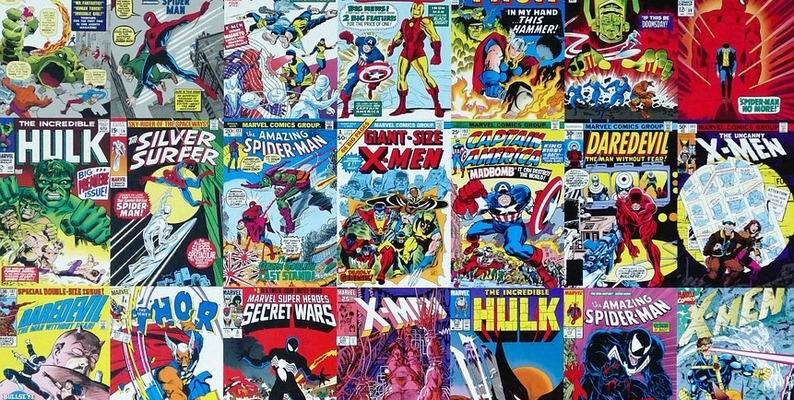

# Abstract

Las editoriales de cómics norteamericanas DC y Marvel han creado algunos de los personajes más icónicos de la cultura pop. La historia de los personajes de cómics de DC y Marvel se remonta a la década de 1930, cuando los cómics comenzaron a ganar popularidad en los Estados Unidos.

Los cómics han tenido un impacto significativo en la cultura pop, influyendo en varios aspectos de la sociedad, como el arte, la literatura, el cine, la televisión e incluso la política. Desde principios del siglo XX hasta la actualidad, los cómics han servido como medio para contar historias y han desempeñado un papel en la configuración de la cultura popular. Los personajes de cómics de DC y Marvel se han convertido en un fenómeno cultural global, y su popularidad ha trascendido el mundo de los cómics para convertirse en una parte integral de la cultura popular moderna. Hoy en día, los personajes de cómics son conocidos en todo el mundo y se han convertido en una parte importante de la cultura general. Los personajes de cómics han sido adaptados a películas, programas de televisión, videojuegos y otros medios, lo que ha ayudado a aumentar su popularidad y atraer a nuevas audiencias





# Introducción al DataSet

Dataset_URL: https://www.kaggle.com/datasets/sujaykapadnis/comic-book-characters/data

Partiré comentando sobre la base de datos "Comic Characters Database", la cual básicamente es información sobre el mundo de los cómics desde el año 1935 hasta el año 2013. En particular, contiene información acerca de:

* page_id: El identificador único de la página del personaje dentro de la wikia
* name: El nombre del personaje
* urlslug: La url única dentro de la wikia que te lleva al personaje
* ID: El estado de identidad del personaje (Identidad Secreta, Identidad Pública, [solo en marvel: Sin Doble Identidad])
* ALIGN: Si el personaje es Bueno, Malo o Neutral
* EYE: El color de ojos del personaje
* HAIR: El color de pelo del personaje
* SEX: El sexo del personaje (por ejemplo, Masculino, Femenino, etc.)
* GSM: Si el personaje es una minoría de género o sexual (por ejemplo, personajes homosexuales, bisexuales)
* ALIVE: Si el personaje está vivo o fallecido
* APPEARANCES: El número de apariciones del personaje en cómics (a partir del 2 de septiembre de 2014. El número se volverá cada vez más desactualizado a medida que pase el tiempo.)
* FIRST APPEARANCE: El mes y el año de la primera aparición del personaje en un cómic, si está disponible
* YEAR: El año de la primera aparición del personaje en un cómic, si está disponible


El conjunto de datos está dividido en dos archivos, para DC y Marvel, respectivamente: dc-wikia-data.csv y marvel-wikia-data.csv. El conjunto de datos se basa en la historia Comic Books Are Still Made By Men, For Men And About Men2.

# Objetivos

La idea de este Dataset será adentrarnos en la historia de la creación de personajes para entender bien a grandes rasgos el poder creativo de la industria a lo largo de los años. Por ejemplo, destacando los períodos más potentes en creación de personajes para DC, así como para Marvel.

Adicionalmente, analizaré las diferencias por género, personajes más populares u otras estadísticas que se nos hagan intuitivas de validar.



# Hipotesis

1. H1 = La industria de los comics ha tenido un crecimiento explosivo, lo cual se traduce en una gran creación de personajes tanto para Marvel como para DC especialmente desde los años 80.

2. H2 = Existe un sesgo de genero asociado a la creencia que los comics son para "niños". Esto se evaluará con la consideración de la cantidad de personajes femeninos creados respecto del total.

3. H3 = La mayoría de los héroes tienen sus propios comics en donde se enfrentan a varios villanos. Lo anterior significa que deben existir más villanos que héroes a lo largo de los años.

In [3]:
# Importamos Pandas para el manejo de los DataFrame
import pandas as pd
# Importamos drive para montar las carpetas de Google Drive
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Asignamos la dirección de la carpeta donde se encuentra la tarea
direccion_drive = '/content/drive/MyDrive/Colab Notebooks/Tareas_Coderhouse/'
# Se asigna el nombre del archivo
nombre_archivo = 'week9_comic_characters.csv'
ruta_csv = direccion_drive + nombre_archivo
# Cargamos el DataFrame desde el archivo CSV
df = pd.read_csv(ruta_csv)

df.shape # df con 23 mil filas y 17 columnas (sirve)

(23272, 17)

In [5]:
df.head(3) # Revisamos el df

,Unnamed: 0,publisher,page_id,name,urlslug,id,align,eye,hair,sex,gsm,alive,appearances,first_appearance,month,year,date
0,1,Marvel,1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,4043.0,"1962, August",August,1962.0,1962-08-01
1,2,Marvel,7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,NaN,Living Characters,3360.0,"1941, March",March,1941.0,1941-03-01
2,3,Marvel,64786,"Wolverine (James \""Logan\"" Howlett)",\/Wolverine_(James_%22Logan%22_Howlett),Public Identity,NaN,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3061.0,"1974, October",October,1974.0,1974-10-01


In [6]:
# Crearemos un diccionario para validar los posibles valores de las columnas principales
columns_names = ['publisher','align','sex','alive','id']

valores_posibles = {}
# Iteramos y cargamos tanto el nombre como el conteo de unicos en el diccionario
for x in columns_names:
  valores_posibles[x] = df[x].value_counts()

valores_posibles['sex']

sex
Male Characters           16421
Female Characters          5804
Agender Characters           45
Genderless Characters        20
Genderfluid Characters        2
Transgender Characters        1
Name: count, dtype: int64

In [7]:
df.info() # Validamos los tipos de dato

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23272 entries, 0 to 23271
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        23272 non-null  int64  
 1   publisher         23272 non-null  object 
 2   page_id           23272 non-null  int64  
 3   name              23272 non-null  object 
 4   urlslug           23272 non-null  object 
 5   id                17489 non-null  object 
 6   align             17086 non-null  object 
 7   eye               9877 non-null   object 
 8   hair              16734 non-null  object 
 9   sex               22293 non-null  object 
 10  gsm               154 non-null    object 
 11  alive             23266 non-null  object 
 12  appearances       21821 non-null  float64
 13  first_appearance  23203 non-null  object 
 14  month             22457 non-null  object 
 15  year              22388 non-null  float64
 16  date              22386 non-null  object

In [8]:
# Ya que date se indica como objeto, lo transformaremos a datetime
df.date = pd.to_datetime(df['date'], dayfirst=False, format='%Y-%m-%d') # Date a formato datetime
df.year = df.year.astype('float')
# Validamos que el cambio se haya realizado
df[['date','year']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23272 entries, 0 to 23271
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    22386 non-null  datetime64[ns]
 1   year    22388 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 363.8 KB


In [9]:
df.head(3) #Para validar como se ve date

,Unnamed: 0,publisher,page_id,name,urlslug,id,align,eye,hair,sex,gsm,alive,appearances,first_appearance,month,year,date
0,1,Marvel,1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,4043.0,"1962, August",August,1962.0,1962-08-01
1,2,Marvel,7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,NaN,Living Characters,3360.0,"1941, March",March,1941.0,1941-03-01
2,3,Marvel,64786,"Wolverine (James \""Logan\"" Howlett)",\/Wolverine_(James_%22Logan%22_Howlett),Public Identity,NaN,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3061.0,"1974, October",October,1974.0,1974-10-01


In [10]:
df.tail(3)

,Unnamed: 0,publisher,page_id,name,urlslug,id,align,eye,hair,sex,gsm,alive,appearances,first_appearance,month,year,date
23269,23270,DC,283478,William Harrison (New Earth),\/wiki\/William_Harrison_(New_Earth),Public Identity,Good Characters,NaN,NaN,Male Characters,NaN,Living Characters,NaN,NaN,01,NaN,NaT
23270,23271,DC,283471,William McKinley (New Earth),\/wiki\/William_McKinley_(New_Earth),Public Identity,Good Characters,NaN,NaN,Male Characters,NaN,Living Characters,NaN,NaN,01,NaN,NaT
23271,23272,DC,150660,Mookie (New Earth),\/wiki\/Mookie_(New_Earth),Public Identity,Bad Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,NaN,NaN,01,NaN,NaT


Limpieza de datos

In [11]:
# @title
df['año'] = df.date.dt.year # Cree esta variable para filtrar fechas raras
df['año'] = df['año'].fillna(0).astype('int') # Rellené los NA con 0
df = df[df['año'] != 0] # Filtré los 0
df['conteo'] = 1 # Cree una columna para luego realizar operaciones
df.sort_values(by='date').head(3) # Ordenar por fecha

<ipython-input-11-3019ef10125a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['conteo'] = 1 # Cree una columna para luego realizar operaciones


,Unnamed: 0,publisher,page_id,name,urlslug,id,align,eye,hair,sex,gsm,alive,appearances,first_appearance,month,year,date,año,conteo
16607,16608,DC,1702,Richard Occult (New Earth),\/wiki\/Richard_Occult_(New_Earth),Secret Identity,NaN,Grey Eyes,Black Hair,Male Characters,NaN,Living Characters,125.0,"1935, October",October,1935.0,1935-10-01,1935,1
23262,23263,DC,289378,Bedivere (New Earth),\/wiki\/Bedivere_(New_Earth),NaN,NaN,NaN,NaN,Male Characters,NaN,Living Characters,NaN,"1936, February",February,1936.0,1936-02-01,1936,1
18312,18313,DC,119545,Lady of the Lake (New Earth),\/wiki\/Lady_of_the_Lake_(New_Earth),NaN,Good Characters,Blue Eyes,Blue Hair,Female Characters,NaN,Living Characters,13.0,"1936, February",February,1936.0,1936-02-01,1936,1


In [12]:
# Validar si los nombres se repiten o no (conteo > 1)
df.name.value_counts().sort_values(ascending=False)

name
Spider-Man (Peter Parker)     1
Ororo Munroe (Earth-616)      1
Thor (Thor Odinson)           1
Benjamin Grimm (Earth-616)    1
Reed Richards (Earth-616)     1
                             ..
Basil Karlo (New Earth)       1
Catwoman (Selina Kyle)        1
J'onn J'onzz (New Earth)      1
Pasha Gorki (New Earth)       1
Bedivere (New Earth)          1
Name: count, Length: 22386, dtype: int64

In [13]:
df.describe() # Para validar que datos eran int/float

,Unnamed: 0,page_id,appearances,year,date,año,conteo
count,22386.000000,22386.000000,21144.000000,22386.000000,22386,22386.000000,22386.0
mean,11601.474984,246415.664433,19.329881,1986.419905,1986-11-21 10:18:48.919860608,1986.419905,1.0
min,1.000000,1025.000000,1.000000,1935.000000,1935-10-01 00:00:00,1935.000000,1.0
25%,5689.250000,29826.500000,1.000000,1976.000000,1976-07-01 00:00:00,1976.000000,1.0
50%,11567.500000,185722.000000,4.000000,1990.000000,1990-12-01 00:00:00,1990.000000,1.0
75%,17605.750000,441246.250000,10.000000,2001.000000,2001-08-01 00:00:00,2001.000000,1.0
max,23263.000000,755278.000000,4043.000000,2013.000000,2013-10-01 00:00:00,2013.000000,1.0
std,6771.756028,225642.872281,94.444291,18.973540,NaN,18.973540,0.0


In [14]:
df['sex'].value_counts()

sex
Male Characters           15834
Female Characters          5574
Agender Characters           36
Genderless Characters        20
Genderfluid Characters        2
Transgender Characters        1
Name: count, dtype: int64

Analisis Bivariado

Tabla de Contingencia Align vs Sex 

align              Bad Characters  Good Characters  Reformed Criminals
sex                                                                   
Female Characters            1523             2383                   1
Male Characters              7347             4621                   2




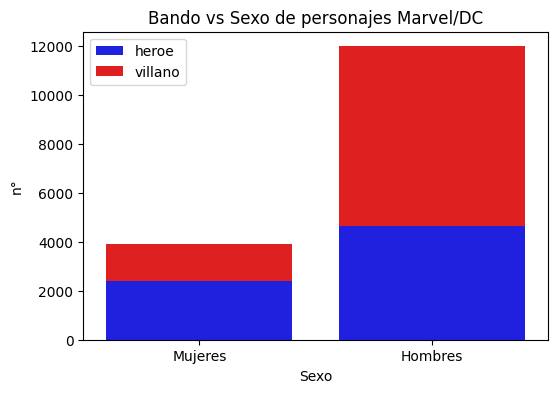

In [15]:
# Importar librerías
import matplotlib.pyplot as plt
import seaborn as sns

# Elegir dos variables de interés
gender = df["sex"]
alignment = df["align"]


# Filtrar solo los personajes masculinos y femeninos
df_filtro_sexo = df[df["sex"].isin(["Male Characters", "Female Characters"])]


# Crear una tabla de contingencia independiente
tabla_cont_df_filtro_sexo = pd.crosstab(df_filtro_sexo["sex"], df_filtro_sexo["align"]).copy()
print("Tabla de Contingencia Align vs Sex \n")
print(tabla_cont_df_filtro_sexo)
print("\n")

# Crear el gráfico de barra apilada

plt.figure(figsize=(6, 4))

sns.barplot(x=tabla_cont_df_filtro_sexo.index,
            y=tabla_cont_df_filtro_sexo["Good Characters"], color="blue", label="heroe")
sns.barplot(x=tabla_cont_df_filtro_sexo.index,
            y=tabla_cont_df_filtro_sexo["Bad Characters"], color="red",
            bottom=tabla_cont_df_filtro_sexo["Good Characters"], label="villano")

plt.legend()
plt.xlabel("Sexo")
plt.ylabel("n°")
plt.title("Bando vs Sexo de personajes Marvel/DC")
plt.xticks(ticks=[0, 1], labels=["Mujeres", "Hombres"], rotation=0)  # Modificamos las etiquetas del eje x
plt.show()

In [16]:
# Análisis de Hipótesis Chi-Cuadrado

# En este código, realizamos una prueba de hipótesis chi-cuadrado para evaluar la relación entre el género y el alineamiento de los personajes de cómics.

# 1. Importamos la librería scipy.stats para realizar la prueba chi-cuadrado.
import scipy.stats as stats

# 2. Realizamos la prueba chi-cuadrado utilizando la función chi2_contingency.
#    - La tabla de contingencia (tabla_cont_df_filtro_sexo) contiene las frecuencias observadas de los personajes según su género y alineamiento.
#    - La hipótesis nula (H0) es que no hay asociación significativa entre el género y el alineamiento (son independientes).
#    - La hipótesis alternativa (H1) es que existe una asociación significativa.
chi2, p_value, _, _ = stats.chi2_contingency(tabla_cont_df_filtro_sexo)

# 3. Definimos el nivel de significación (alfa). Por ejemplo, alfa = 0.05.
alfa = 0.05

# 4. Comparamos el valor p obtenido con alfa:
if p_value < alfa:
    print(f"Valor p ({p_value:.4f}) es menor que alfa ({alfa:.4f}). Rechazamos la hipótesis nula.")
else:
    print(f"Valor p ({p_value:.4f}) no es menor que alfa ({alfa:.4f}). No rechazamos la hipótesis nula.")

# Conclusiones:
# - El valor p = cero sugiere que existe una asociación significativa entre el género y el alineamiento de los personajes.
# - Los personajes masculinos y femeninos pueden tener diferentes proporciones de alineamientos (buenos o malos).
# - Estos resultados son útiles para comprender las dinámicas de los personajes en el mundo de los cómics.

Valor p (0.0000) es menor que alfa (0.0500). Rechazamos la hipótesis nula.


In [20]:
# Obtiene todas las columnas excepto "align"
columns_to_test = [col for col in df_filtro_sexo.columns if col != "align"]

# Itera a través de las columnas y realiza la prueba de chi-cuadrado
for col in columns_to_test:
    contingency_table = pd.crosstab(df_filtro_sexo[col], df_filtro_sexo["align"])
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

    print(f"Columna: {col}")
    print("Valor p:", p)

    alpha = 0.05
    if p < alpha:
        print("Rechazamos la hipótesis nula: Hay una relación significativa entre", col, "y 'align'.")
    else:
        print("No rechazamos la hipótesis nula: No hay suficiente evidencia para afirmar una relación significativa.")
    print("-" * 50)

Columna: Unnamed: 0
Valor p: 0.4957785377652749
No rechazamos la hipótesis nula: No hay suficiente evidencia para afirmar una relación significativa.
--------------------------------------------------
Columna: publisher
Valor p: 1.3203301814429232e-24
Rechazamos la hipótesis nula: Hay una relación significativa entre publisher y 'align'.
--------------------------------------------------
Columna: page_id
Valor p: 1.0
No rechazamos la hipótesis nula: No hay suficiente evidencia para afirmar una relación significativa.
--------------------------------------------------
Columna: name
Valor p: 0.4957785377652749
No rechazamos la hipótesis nula: No hay suficiente evidencia para afirmar una relación significativa.
--------------------------------------------------
Columna: urlslug
Valor p: 0.4957785377652807
No rechazamos la hipótesis nula: No hay suficiente evidencia para afirmar una relación significativa.
--------------------------------------------------
Columna: id
Valor p: 5.2019800068

##### **Hipotesis número 1**
La industria de los comics ha tenido un crecimiento explosivo, lo cual se traduce en una gran creación de personajes tanto para Marvel como para DC especialmente desde los años 80.

In [21]:
# Seleccionamos el estilo para los gráficos
sns.set_theme(style="darkgrid")

In [22]:
# Se creará una tabla donde se ingresen la cantidad de personjes creados por año
nuevo_df = df.pivot_table(index='year', columns='publisher', values='name', aggfunc='count')
# La Tabla esta llena de NaN por lo que procedo a reemplazar por 0
nuevo_df = nuevo_df.fillna(0)
# Se crea un columna Total que contemple la suma de DC y Marvel
nuevo_df['Total'] = nuevo_df['DC'] + nuevo_df['Marvel']

nuevo_df.head()

publisher,DC,Marvel,Total
year,,,
1935.0,1.0,0.0,1.0
1936.0,9.0,0.0,9.0
1937.0,4.0,0.0,4.0
1938.0,10.0,0.0,10.0
1939.0,18.0,69.0,87.0


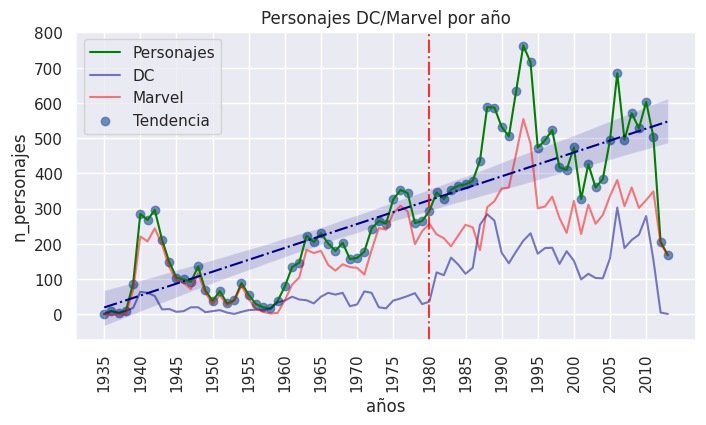

In [23]:
# Realizaré un gráfico de líneas de personajes creados por año

fig,axs = plt.subplots(figsize=(8,4))

# Línea principal personajes totales por año
sns.lineplot(data=nuevo_df,x=nuevo_df.index,y='Total',
             color='green',label='Personajes')
# Líneas secundarias para DC y Marvel
sns.lineplot(data=nuevo_df,x=nuevo_df.index,y='DC',
             color='darkblue',label='DC',alpha=0.5)
sns.lineplot(data=nuevo_df,x=nuevo_df.index,y='Marvel',
             color='red',label='Marvel',alpha=0.5)
# Línea secundaria para la Tendencia
sns.regplot(x=nuevo_df.index, y='Total', data=nuevo_df,label='Tendencia',
           line_kws={'color': 'darkblue', 'linewidth': 1.5, 'linestyle': '-.'})
# Línea vertical de apoyo para enmarcar el año 1980 (por la hipotesis)
axs.axvline(x=1980, color='red', linestyle='-.',alpha=0.8)

# Leyendas del gráfico
plt.title('Personajes DC/Marvel por año')
axs.set_ylabel('n_personajes')
axs.set_xlabel('años')
axs.legend()
# Para no saturar de años el eje x
plt.xticks(range(1935, 2014, 5), rotation=90)
plt.show()

#### **Conclusión Hipotesis número 1**
Visualmente se puede validar el crecimiento de la Industria en número de personajes creados por año, con una tendencia al alza que no se ha detenido.

Efectivamente en la década de los 80 (a finales) existió un crecimiento considerable, se puede observar que la década de los 90 fue la mejor.

#### **Hipotesis número 2**

Existe un sesgo de genero asociado a la creencia que los comics son para "niños". Esto se evaluará con la consideración de la cantidad de personajes femeninos creados respecto del total.


''

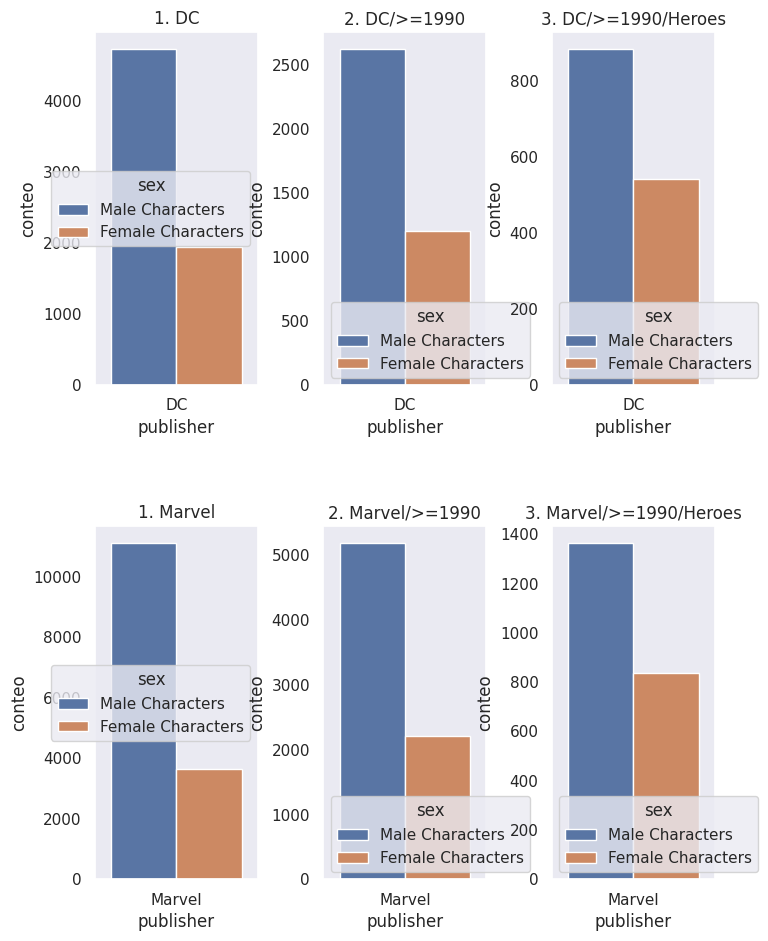

In [24]:
# Gráfico de barras de cantidad de personajes creados por genero y editorial
sns.set_theme(style="dark")
fig,axs = plt.subplots(nrows=2,ncols=3,figsize=(8,11),sharex=False,sharey=False)

# Código que separa las filas de gráficos (chocaban leyendas eje x con titulos de la otra fila)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

# Gráfico 1 que considera la editorial DC (se filtran generos no binarios)
sns.barplot(data=df.query("publisher=='DC' and (sex=='Male Characters' or sex=='Female Characters')"),
            x='publisher',y='conteo',hue='sex',
            estimator=len,ax=axs[0][0], order=['DC'])

# Gráfico 2 que considera la editorial DC (se filtran generos no binarios) y el año 1990
sns.barplot(data=df.query("publisher=='DC' and (sex=='Male Characters' or sex=='Female Characters') and año>=1990"),
            x='publisher',y='conteo',hue='sex',
            estimator=len,ax=axs[0][1], order=['DC'])

# Gráfico 3 que considera la editorial DC (se filtran generos no binarios) y el año 1990
sns.barplot(data=df.query("publisher=='DC' and (sex=='Male Characters' or sex=='Female Characters') and año>=1990 and align=='Good Characters'"),
            x='publisher',y='conteo',hue='sex',
            estimator=len,ax=axs[0][2], order=['DC'])

# Gráfico 4 que considera la editorial Marvel (se filtran generos no binarios)
sns.barplot(data=df.query("publisher=='Marvel' and (sex=='Male Characters' or sex=='Female Characters')"),
            x='publisher',y='conteo',hue='sex',
            estimator=len,ax=axs[1][0], order=['Marvel'])

# Gráfico 5 que considera la editorial Marvel (se filtran generos no binarios) y el año 1990
sns.barplot(data=df.query("publisher=='Marvel' and (sex=='Male Characters' or sex=='Female Characters') and año>=1990"),
            x='publisher',y='conteo',hue='sex',
            estimator=len,ax=axs[1][1], order=['Marvel'])

# Gráfico 6 que considera la editorial Marvel (se filtran generos no binarios) y el año 1990
sns.barplot(data=df.query("publisher=='Marvel' and (sex=='Male Characters' or sex=='Female Characters') and año>=1990 and align=='Good Characters'"),
            x='publisher',y='conteo',hue='sex',
            estimator=len,ax=axs[1][2], order=['Marvel'])


# Titulos para los gráficos de DC (primera Fila)
axs[0][0].set_title('1. DC')
axs[0][1].set_title('2. DC/>=1990')
axs[0][2].set_title('3. DC/>=1990/Heroes')

# Titulos para los gráficos de Marvel (segunda Fila)
axs[1][0].set_title('1. Marvel')
axs[1][1].set_title('2. Marvel/>=1990')
axs[1][2].set_title('3. Marvel/>=1990/Heroes')

;

In [25]:
# Datos adicionales para determinar porcentajes

dc_male = df.query("publisher=='DC' and sex=='Male Characters'")["conteo"].sum()
dc_female = df.query("publisher=='DC' and sex=='Female Characters'")["conteo"].sum()
marvel_male = df.query("publisher=='Marvel' and sex=='Male Characters'")["conteo"].sum()
marvel_female = df.query("publisher=='Marvel' and sex=='Female Characters'")["conteo"].sum()
total_personajes = df.conteo.sum()


print('El total de personajes creados desde el año 1935 es de {}, de los cuales el {}% son femeninos'.
      format(total_personajes,round(((marvel_female + dc_female)/total_personajes)*100,2)))

El total de personajes creados desde el año 1935 es de 22386, de los cuales el 24.9% son femeninos


#### **Conclusión Hipotesis número 2**

En este análisis, hemos explorado la distribución de los personajes de cómics por género y editorial, con el fin de evaluar la representación femenina en este medio. Los resultados muestran que el género femenino está subrepresentado en ambas editoriales, tanto en el total de personajes creados como en los creados desde 1990. Sin embargo, se observa una tendencia creciente en la proporción de personajes femeninos, especialmente en el caso de las heroínas

#### **Hipotesis número 3**

La mayoría de los heróes tienen sus propios comics en donde se enfrentan a varios villanos. Lo anterior significa que deben existir más villanos que heróes a lo largo de los años.


<Figure size 800x600 with 0 Axes>

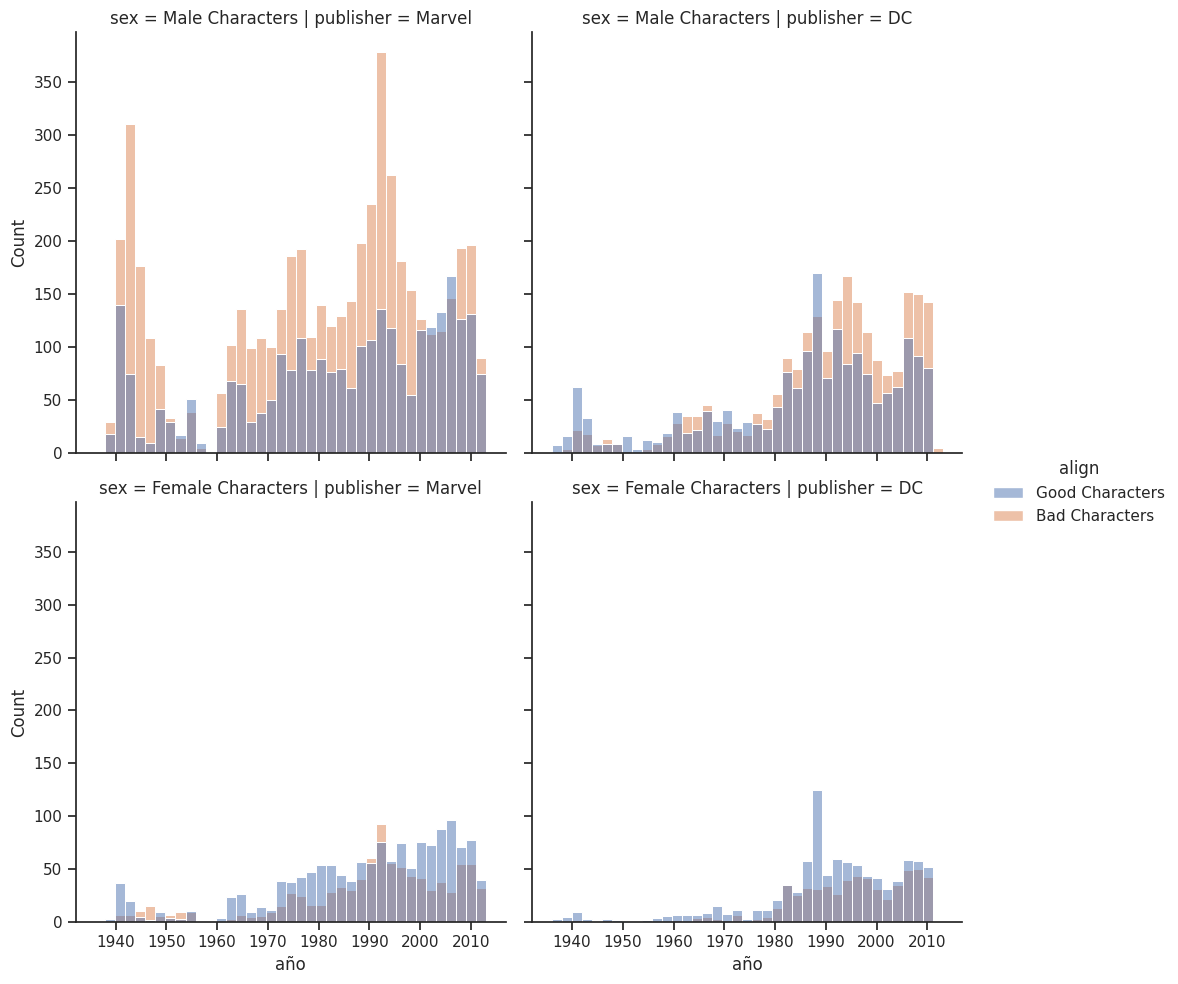

In [26]:
# Gráfico de dispersión considerando vilanos y heroes
sns.set_style("ticks") # cambiamos el estilo nuevamente
sns.set_color_codes('pastel') # No sé si cambió algo

plt.figure(figsize=(8,6))

# Creo un DF nuevo para no hacer tan largo el sns.displot
df_sex = df.query("(sex=='Female Characters' or sex=='Male Characters') and align!='Reformed Criminals'")
# displot por defecto es histograma, se separa en 4 gráficos usando col,row y hue
sns.displot(data=df_sex,x='año',kind='hist',hue='align', col='publisher',legend=True,row='sex')

plt.show()

#### **Conclusión Hipotesis número 2**
Historicamente la creación de villanos ha sobrepasado la de heroes, esto verdad es mucho más evidente en el caso de Marvel donde los villanos sobrepasan por bastante.
Ahora si se vuelve a profundizar en el genero, las heroinas siempre han sido más que las villanas.

# Tarea 3

Abordaremos la reducción de dimensionalidad y aplicaremos técnicas de aprendizaj automático para analizar más a fondo la información de los personajes de cómics.

In [27]:
# Importar Numpy como requisito para poder copiar la tabla df
import numpy as np

In [28]:
# df_t3 (tarea 3) para no alterar el dataframe original
df_t3 = df.copy(deep=True)

In [29]:
df_t3.info() # Validar Dtype y los datos nulls

<class 'pandas.core.frame.DataFrame'>
Index: 22386 entries, 0 to 23262
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Unnamed: 0        22386 non-null  int64         
 1   publisher         22386 non-null  object        
 2   page_id           22386 non-null  int64         
 3   name              22386 non-null  object        
 4   urlslug           22386 non-null  object        
 5   id                16800 non-null  object        
 6   align             16494 non-null  object        
 7   eye               9463 non-null   object        
 8   hair              16142 non-null  object        
 9   sex               21467 non-null  object        
 10  gsm               148 non-null    object        
 11  alive             22383 non-null  object        
 12  appearances       21144 non-null  float64       
 13  first_appearance  22386 non-null  object        
 14  month             22386 non

In [30]:
df_t3.head(2) # Revisar el dataframe

,Unnamed: 0,publisher,page_id,name,urlslug,id,align,eye,hair,sex,gsm,alive,appearances,first_appearance,month,year,date,año,conteo
0,1,Marvel,1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,4043.0,"1962, August",August,1962.0,1962-08-01,1962,1
1,2,Marvel,7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,NaN,Living Characters,3360.0,"1941, March",March,1941.0,1941-03-01,1941,1


In [31]:
# Eliminar columnas que creo son innecesarias para la agrupación
df_t3 = df_t3.drop(['Unnamed: 0','page_id','urlslug','first_appearance','month',
                    'date','año','conteo'],axis=1) #Agregar name después (lo saqué para comprobar cosas)
df_t3.head()

,publisher,name,id,align,eye,hair,sex,gsm,alive,appearances,year
0,Marvel,Spider-Man (Peter Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,4043.0,1962.0
1,Marvel,Captain America (Steven Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,NaN,Living Characters,3360.0,1941.0
2,Marvel,"Wolverine (James \""Logan\"" Howlett)",Public Identity,NaN,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3061.0,1974.0
3,Marvel,"Iron Man (Anthony \""Tony\"" Stark)",Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2961.0,1963.0
4,Marvel,Thor (Thor Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,2258.0,1950.0


In [32]:
# Validar los datos de gsm
df_t3.gsm.value_counts()

gsm
Homosexual Characters     114
Bisexual Characters        29
Transgender Characters      2
Transvestites               1
Pansexual Characters        1
Genderfluid Characters      1
Name: count, dtype: int64

In [33]:
# Crear un diccionario con los valores categóricos y los valores numéricos
gsm_dict = {"Homosexual Characters": 1,
            "Bisexual Characters": 2,
            "Transgender Characters": 3,
            "Transvestites": 4,
            "Pansexual Characters": 5,
            "Genderfluid Characters": 6,
            np.nan: 0} # np.nan es el valor que representa los valores faltantes o NaN
# Crear una nueva columna con los valores numéricos usando el método map()
df_t3["gsm_num"] = df_t3["gsm"].map(gsm_dict)
df_t3 = df_t3.drop(['gsm'],axis=1)

In [34]:
df_t3.gsm_num.value_counts() # Validamos si el cambio quedó bien

gsm_num
0    22238
1      114
2       29
3        2
4        1
5        1
6        1
Name: count, dtype: int64

In [35]:
df_t3.head() # Seguimos validando los cambios en el dataframee

,publisher,name,id,align,eye,hair,sex,alive,appearances,year,gsm_num
0,Marvel,Spider-Man (Peter Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,Living Characters,4043.0,1962.0,0
1,Marvel,Captain America (Steven Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,Living Characters,3360.0,1941.0,0
2,Marvel,"Wolverine (James \""Logan\"" Howlett)",Public Identity,NaN,Blue Eyes,Black Hair,Male Characters,Living Characters,3061.0,1974.0,0
3,Marvel,"Iron Man (Anthony \""Tony\"" Stark)",Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,Living Characters,2961.0,1963.0,0
4,Marvel,Thor (Thor Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,Living Characters,2258.0,1950.0,0


In [36]:
# Validamos si siguen existiendo los NaN
columns_df_t3 = df_t3.isna().shape[0]
listado_columna_nan = ['publisher','id','align','eye','hair','sex','alive','year']
print("df_t3" + " is NaN =  " + str(df_t3.shape[0]))
# Bucle para ver cuantos NaN hay en cada columna
for x in listado_columna_nan:
  print(x + " is NaN = " + str(df_t3[df_t3[x].isna()].shape[0]))

df_t3 is NaN =  22386
publisher is NaN = 0
id is NaN = 5586
align is NaN = 5892
eye is NaN = 12923
hair is NaN = 6244
sex is NaN = 919
alive is NaN = 3
year is NaN = 0


In [37]:
# Reemplazar los valores NaN por "Unknown" solo en las columnas "align", "eye", "hair", "sex" y "alive"
# df_t3 = df_t3.fillna({"align": "Unknown", "eye": "Unknown", "hair": "Unknown", "sex": "Unknown", "alive": "Unknown"})

In [38]:
# Obtener la moda de cada columna
mode_t3 = df_t3.mode()

# Crear un diccionario con la moda de cada columna
mode_dict = {col: mode_t3[col][0] for col in ['align', 'eye', 'hair', 'sex', 'alive','id']}

# Rellenar los valores NaN con la moda de cada columna
df_t3 = df_t3.fillna(mode_dict)

In [39]:
media_appearances = df_t3['appearances'].mean()

df_t3['appearances'] = df_t3['appearances'].fillna(media_appearances)

In [40]:
# Ver cual es la moda (idea del ayudante en clase)
for x in ['align', 'eye', 'hair', 'sex', 'alive','id']:
  print(df_t3[x].mode())

0    Bad Characters
Name: align, dtype: object
0    Blue Eyes
Name: eye, dtype: object
0    Black Hair
Name: hair, dtype: object
0    Male Characters
Name: sex, dtype: object
0    Living Characters
Name: alive, dtype: object
0    Secret Identity
Name: id, dtype: object


In [41]:
df_t3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22386 entries, 0 to 23262
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   publisher    22386 non-null  object 
 1   name         22386 non-null  object 
 2   id           22386 non-null  object 
 3   align        22386 non-null  object 
 4   eye          22386 non-null  object 
 5   hair         22386 non-null  object 
 6   sex          22386 non-null  object 
 7   alive        22386 non-null  object 
 8   appearances  22386 non-null  float64
 9   year         22386 non-null  float64
 10  gsm_num      22386 non-null  int64  
dtypes: float64(2), int64(1), object(8)
memory usage: 2.6+ MB


In [42]:
# Validamos si siguen existiendo los NaN
columns_df_t3 = df_t3.isna().shape[0]
listado_columna_nan = ['publisher','id','align','eye','hair','sex','alive','year']
print("df_t3" + " is NaN =  " + str(df_t3.shape[0]))
# Bucle para ver cuantos NaN hay en cada columna
for x in listado_columna_nan:
  print(x + " is NaN = " + str(df_t3[df_t3[x].isna()].shape[0]))

df_t3 is NaN =  22386
publisher is NaN = 0
id is NaN = 0
align is NaN = 0
eye is NaN = 0
hair is NaN = 0
sex is NaN = 0
alive is NaN = 0
year is NaN = 0


In [43]:
# Importamos librerias de ML
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [44]:
df_t3.info() # Vemos los tipos de datos

<class 'pandas.core.frame.DataFrame'>
Index: 22386 entries, 0 to 23262
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   publisher    22386 non-null  object 
 1   name         22386 non-null  object 
 2   id           22386 non-null  object 
 3   align        22386 non-null  object 
 4   eye          22386 non-null  object 
 5   hair         22386 non-null  object 
 6   sex          22386 non-null  object 
 7   alive        22386 non-null  object 
 8   appearances  22386 non-null  float64
 9   year         22386 non-null  float64
 10  gsm_num      22386 non-null  int64  
dtypes: float64(2), int64(1), object(8)
memory usage: 2.6+ MB


In [45]:
df_t3 = df_t3.drop(['name'],axis=1) # sacamos la columna name pra proceder

In [46]:
# Importar la librería necesaria
import pandas as pd
# Crear el nuevo dataframe con las columnas binarias usando la función get_dummies()
df_align = pd.get_dummies(df_t3["align"])
# Unir el nuevo dataframe con el dataframe original usando el método join()
df_t3 = df_t3.join(df_align)
# Cambiar el nombre de la columna 'unknown' a 'unknown_align'
df_t3.rename(columns={'Unknown': 'Unknown_Align'}, inplace=True)

In [47]:
df_t3.tail() # Visualizamos los datos

,publisher,id,align,eye,hair,sex,alive,appearances,year,gsm_num,Bad Characters,Good Characters,Reformed Criminals
23258,DC,Public Identity,Bad Characters,Brown Eyes,Brown Hair,Female Characters,Deceased Characters,19.329881,1941.0,0,True,False,False
23259,DC,Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,Living Characters,19.329881,1941.0,0,False,True,False
23260,DC,Secret Identity,Bad Characters,Black Eyes,Black Hair,Male Characters,Living Characters,19.329881,1940.0,0,True,False,False
23261,DC,Secret Identity,Bad Characters,Green Eyes,Black Hair,Female Characters,Living Characters,19.329881,1940.0,0,True,False,False
23262,DC,Secret Identity,Bad Characters,Blue Eyes,Black Hair,Male Characters,Living Characters,19.329881,1936.0,0,True,False,False


:# **Árbol de Decisión ML**

> Darle tratamiento a los NULL

> Traspasar las variables categóricas a númericas (onehotencoder o la versión de panda)

> Aplicar DecisionTreeClassifier de SKLearn



In [48]:
# Creamos una copia de df llamado df_dt (DataFrame DecisionTree)
df_dt = df.copy()
# Lista de columnas que no vamos a utilizar y que no sirven para encodear
list_drop_dt = ['Unnamed: 0','urlslug','appearances',
                'first_appearance','month','year','date',
                'conteo','año','name','page_id','gsm']
df_dt.drop(columns=list_drop_dt, inplace = True)
df_dt.head(2)

,publisher,id,align,eye,hair,sex,alive
0,Marvel,Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,Living Characters
1,Marvel,Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,Living Characters


In [49]:
# Lista de columnas en las que queremos rellenar los valores nulos
columnas_a_rellenar = ['publisher', 'id', 'align', 'eye', 'hair', 'sex', 'alive']

# Itera a través de cada columna y rellena los valores nulos con la moda
for columna in columnas_a_rellenar:
    df_dt[columna].fillna(df_dt[columna].mode()[0], inplace=True)

# Verifica si los valores nulos se han reemplazado correctamente
print(df_dt.isnull().sum())

publisher    0
id           0
align        0
eye          0
hair         0
sex          0
alive        0
dtype: int64


In [50]:
df_dt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22386 entries, 0 to 23262
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   publisher  22386 non-null  object
 1   id         22386 non-null  object
 2   align      22386 non-null  object
 3   eye        22386 non-null  object
 4   hair       22386 non-null  object
 5   sex        22386 non-null  object
 6   alive      22386 non-null  object
dtypes: object(7)
memory usage: 1.9+ MB


In [51]:
# Veremos los posibles valores de todas las columnas
for columna in columnas_a_rellenar:
  print("Valores para la columna " + columna )
  print("\n" + str(df_dt[columna].value_counts()))
  print("----------------------------------------")

Valores para la columna publisher

publisher
Marvel    15561
DC         6825
Name: count, dtype: int64
----------------------------------------
Valores para la columna id

id
Secret Identity                  13957
Public Identity                   6807
No Dual Identity                  1598
Known to Authorities Identity       15
Identity Unknown                     9
Name: count, dtype: int64
----------------------------------------
Valores para la columna align

align
Bad Characters        15221
Good Characters        7162
Reformed Criminals        3
Name: count, dtype: int64
----------------------------------------
Valores para la columna eye

eye
Blue Eyes             15877
Brown Eyes             2695
Black Eyes              925
Green Eyes              870
Red Eyes                688
White Eyes              479
Yellow Eyes             321
Grey Eyes               131
Hazel Eyes               90
Photocellular Eyes       48
Variable Eyes            46
Purple Eyes              39
Orange

In [52]:
# Importa las bibliotecas necesarias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [53]:
# Crea una copia del dataframe
df_dt_2 = df_dt.copy()

# Crea un objeto OneHotEncoder
onehotencoder = OneHotEncoder()

# Ajusta el OneHotEncoder a las columnas categóricas
df_dt_2 = pd.get_dummies(df_dt_2, columns=['publisher', 'id', 'eye', 'hair', 'sex', 'alive'])

# Separa las variables independientes (X) y la variable dependiente (y)
X = df_dt_2.drop('align', axis=1)
y = df_dt_2['align']

# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Crea un objeto DecisionTreeClassifier
clf = DecisionTreeClassifier()

# Entrena el modelo en el conjunto de entrenamiento
clf.fit(X_train, y_train)

# Predice las clases en el conjunto de prueba
y_pred = clf.predict(X_test)

# Calcula la precisión en el conjunto de prueba
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo en el conjunto de prueba: {accuracy:.2f}")

Precisión del modelo en el conjunto de prueba: 0.68


In [54]:
y_pred

array(['Bad Characters', 'Bad Characters', 'Bad Characters', ...,
       'Bad Characters', 'Bad Characters', 'Good Characters'],
      dtype=object)

In [55]:
df_dt_2.head(2)

,align,publisher_DC,publisher_Marvel,id_Identity Unknown,id_Known to Authorities Identity,id_No Dual Identity,id_Public Identity,id_Secret Identity,eye_Amber Eyes,eye_Auburn Hair,...,hair_White Hair,hair_Yellow Hair,sex_Agender Characters,sex_Female Characters,sex_Genderfluid Characters,sex_Genderless Characters,sex_Male Characters,sex_Transgender Characters,alive_Deceased Characters,alive_Living Characters
0,Good Characters,False,True,False,False,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,True
1,Good Characters,False,True,False,False,False,True,False,False,False,...,True,False,False,False,False,False,True,False,False,True


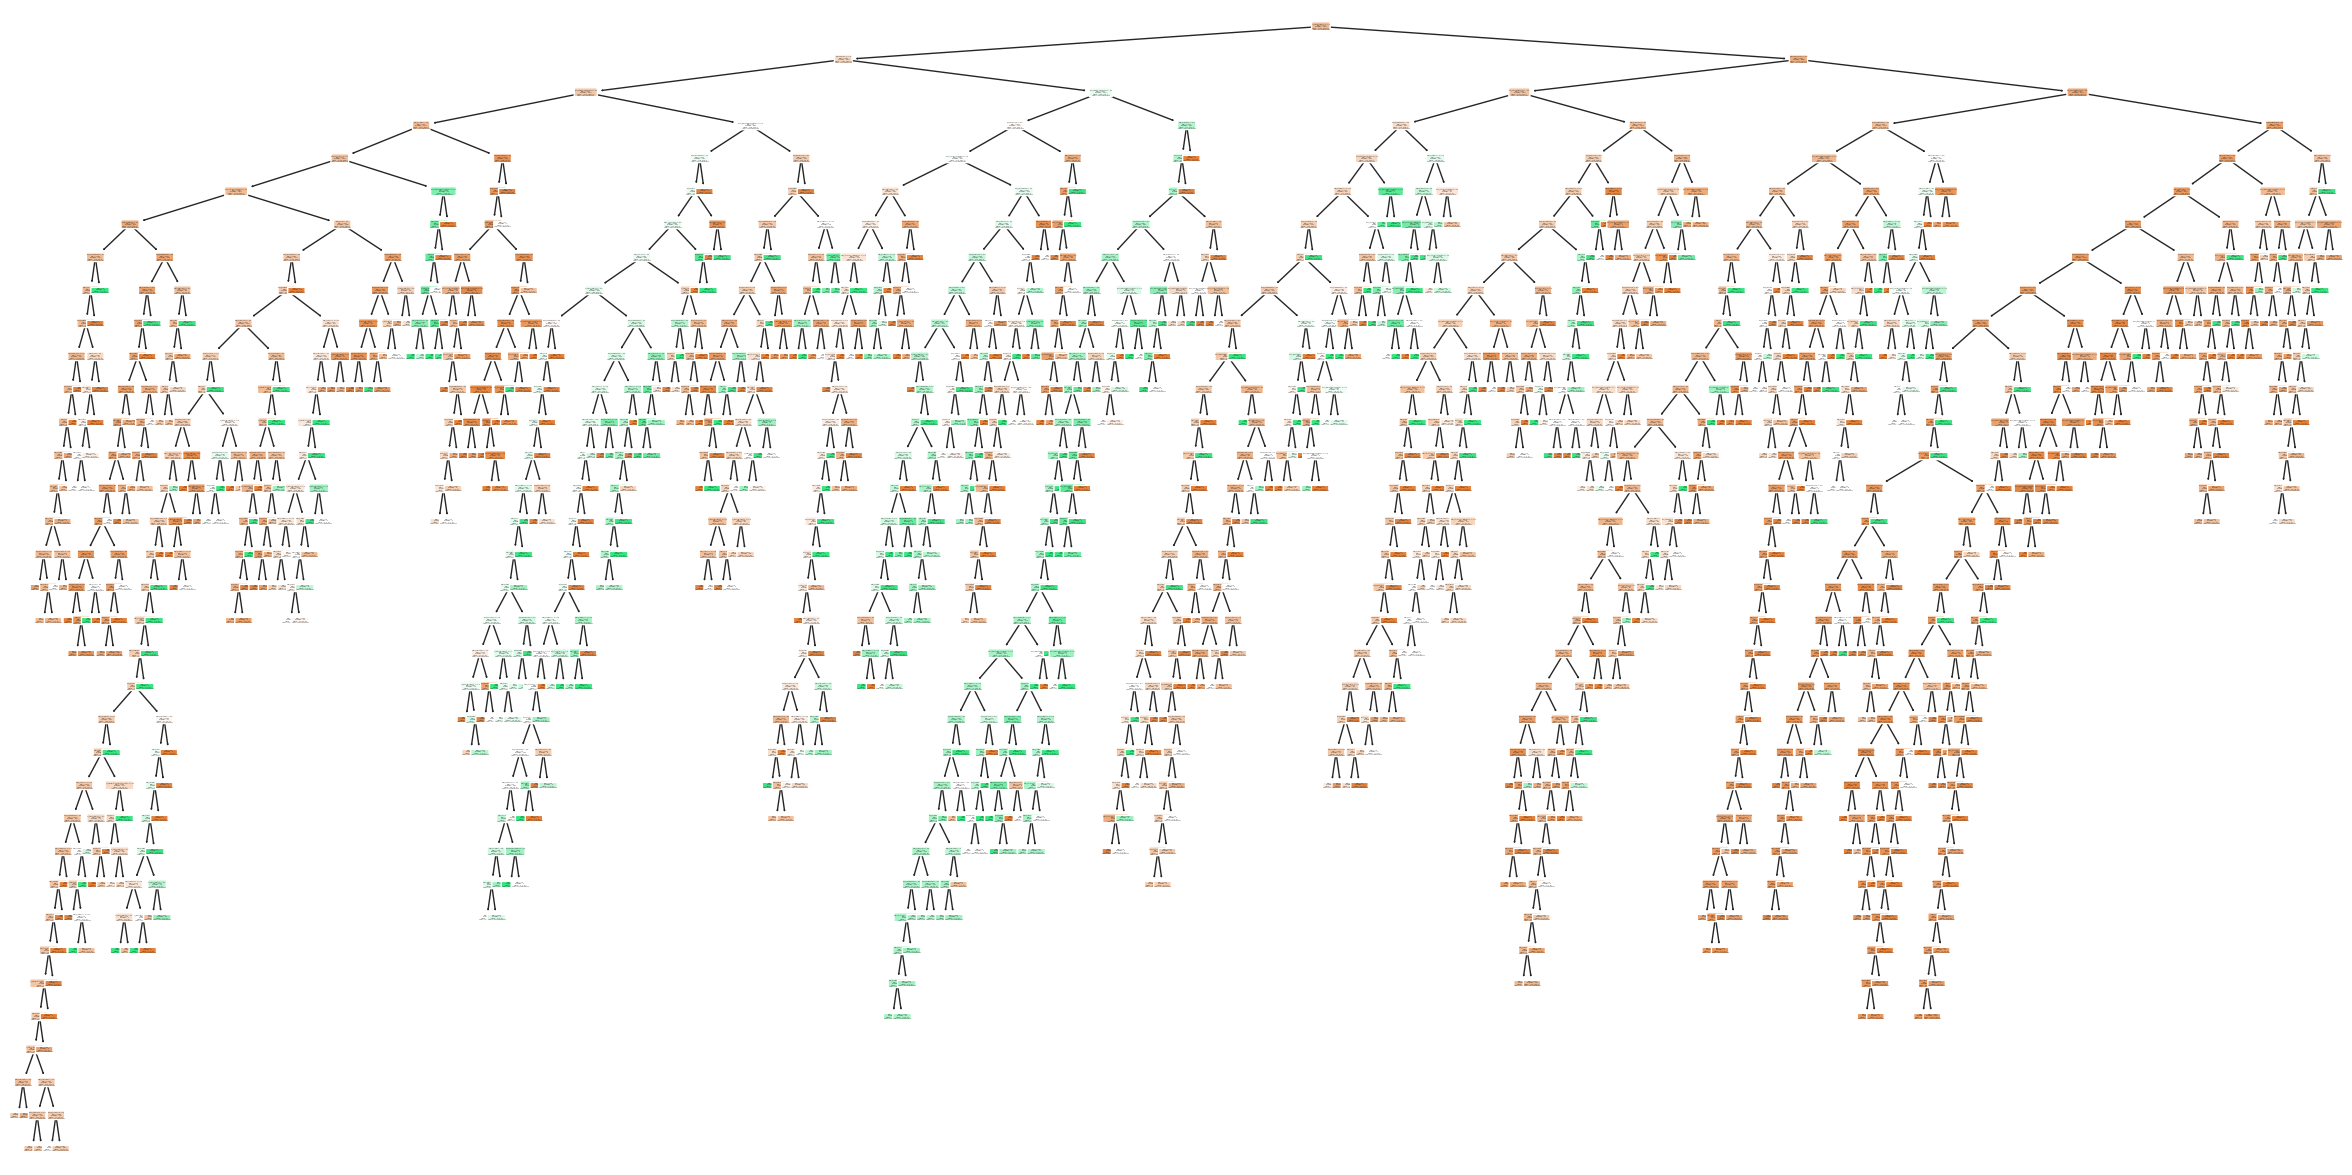

In [56]:
# Graficaremos el árbol de decisión
from sklearn.tree import plot_tree # traemos el gráfico desde sklearn

plt.figure(figsize=(30, 15))
plot_tree(clf, feature_names=X.columns, class_names=clf.classes_, filled=True, rounded=True)
plt.show()

<Axes: title={'center': 'year_scaled vs index'}, xlabel='index', ylabel='year_scaled'>

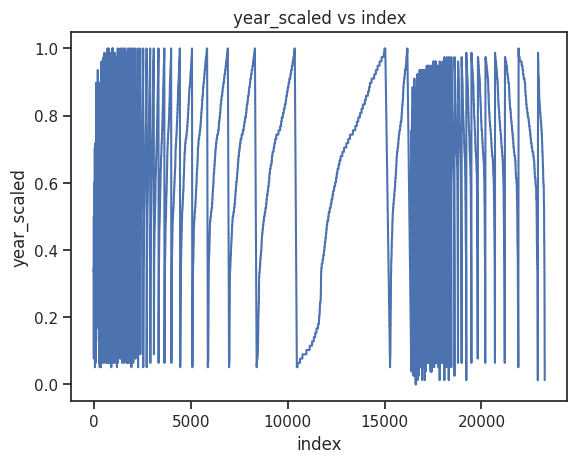

In [57]:
# Importar la librería necesaria
from sklearn.preprocessing import MinMaxScaler

# Crear el objeto StandardScaler
scaler = MinMaxScaler()

# Transformar la columna YEAR usando el método fit_transform()
df_t3["year_scaled"] = scaler.fit_transform(df_t3[["year"]])

# Graficar la columna YEAR_scaled usando un gráfico de línea
df_t3["year_scaled"].plot(kind="line", title="year_scaled vs index", xlabel="index", ylabel="year_scaled")



In [58]:
df_t3 = df_t3.drop(['align','year'],axis=1) # Dropiamos las columnas align y year
# df_t3.rename(columns={'year_scaled': 'year'}, inplace=True)
df_t3.head()

,publisher,id,eye,hair,sex,alive,appearances,gsm_num,Bad Characters,Good Characters,Reformed Criminals,year_scaled
0,Marvel,Secret Identity,Hazel Eyes,Brown Hair,Male Characters,Living Characters,4043.0,0,False,True,False,0.346154
1,Marvel,Public Identity,Blue Eyes,White Hair,Male Characters,Living Characters,3360.0,0,False,True,False,0.076923
2,Marvel,Public Identity,Blue Eyes,Black Hair,Male Characters,Living Characters,3061.0,0,True,False,False,0.500000
3,Marvel,Public Identity,Blue Eyes,Black Hair,Male Characters,Living Characters,2961.0,0,False,True,False,0.358974
4,Marvel,No Dual Identity,Blue Eyes,Blond Hair,Male Characters,Living Characters,2258.0,0,False,True,False,0.192308


In [59]:
# Importar la librería necesaria
from sklearn.preprocessing import LabelEncoder

# Crear el objeto LabelEncoder
le = LabelEncoder()

# Transformar la columna ID usando el método fit_transform()
df_t3["id_num"] = le.fit_transform(df_t3["id"]) # ID
df_t3["publisher_num"] = le.fit_transform(df_t3["publisher"]) # publisher
df_t3["eye_num"] = le.fit_transform(df_t3["eye"]) # eye
df_t3["hair_num"] = le.fit_transform(df_t3["hair"]) # hair
df_t3["sex_num"] = le.fit_transform(df_t3["sex"]) # sex
df_t3["alive_num"] = le.fit_transform(df_t3["alive"]) # alive

df_t3 = df_t3.drop(['id','publisher','eye','hair','sex','alive'],axis=1)


df_t3.head()

,appearances,gsm_num,Bad Characters,Good Characters,Reformed Criminals,year_scaled,id_num,publisher_num,eye_num,hair_num,sex_num,alive_num
0,4043.0,0,False,True,False,0.346154,4,1,10,6,4,1
1,3360.0,0,False,True,False,0.076923,3,1,4,26,4,1
2,3061.0,0,True,False,False,0.500000,3,1,4,2,4,1
3,2961.0,0,False,True,False,0.358974,3,1,4,2,4,1
4,2258.0,0,False,True,False,0.192308,2,1,4,3,4,1


In [60]:
# Vamos a revisar la correlación entre las variables del DF_T3
correlation_matrix = df_t3.corr()
correlation_with_sex_num = correlation_matrix['appearances'] # Correlación vs 'appearances'
sorted_correlation = correlation_with_sex_num.abs().sort_values(ascending=False)
sorted_correlation

appearances           1.000000
Bad Characters        0.122536
Good Characters       0.122518
year_scaled           0.118265
gsm_num               0.061689
id_num                0.047016
hair_num              0.031247
publisher_num         0.030539
alive_num             0.024363
eye_num               0.020127
sex_num               0.012721
Reformed Criminals    0.001304
Name: appearances, dtype: float64

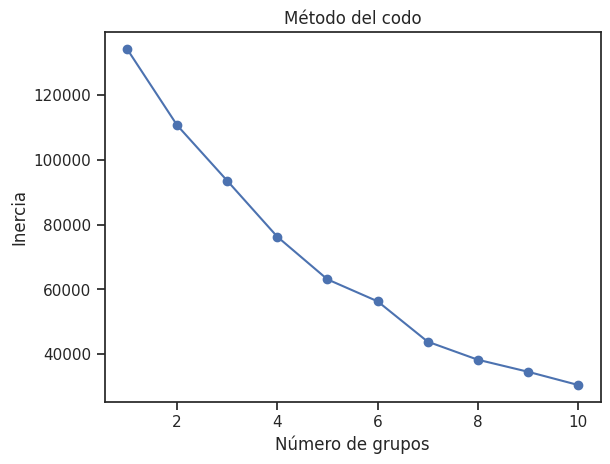

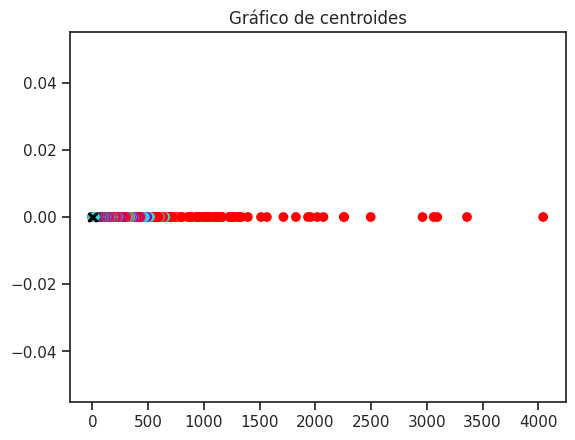

In [61]:
# Escoger las variables numéricas que se van a usar para el análisis de clusters
X = df_t3[['gsm_num','Good Characters','sex_num','id_num','alive_num','appearances']]

# Normalizar las variables numéricas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar el algoritmo de K-means con diferentes números de clusters
inercias = [] # Lista para guardar la suma de las distancias al cuadrado de cada punto a su centroide
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inercias.append(kmeans.inertia_)

# Graficar el método del codo
plt.plot(range(1, 11), inercias, marker='o')
plt.xlabel('Número de grupos')
plt.ylabel('Inercia')
plt.title('Método del codo')
plt.show()

# Elegir el número de clusters que se quieren encontrar (en este caso, 4)
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans.fit(X_scaled)

# Obtener las etiquetas de los clusters para cada punto
labels = kmeans.labels_

# Obtener los centroides de cada cluster
centroids = kmeans.cluster_centers_

# Visualizar los resultados de la clusterización usando la variable year_scaled
plt.scatter(df_t3["appearances"], np.zeros(len(df_t3)), c=labels, cmap="rainbow")
plt.scatter(centroids[:, 4], np.zeros(len(centroids)), marker="x", color="black")
plt.title('Gráfico de centroides')
plt.show()

In [62]:
df_t3 = df_t3.assign(cluster=labels)
df_t3

,appearances,gsm_num,Bad Characters,Good Characters,Reformed Criminals,year_scaled,id_num,publisher_num,eye_num,hair_num,sex_num,alive_num,cluster
0,4043.000000,0,False,True,False,0.346154,4,1,10,6,4,1,3
1,3360.000000,0,False,True,False,0.076923,3,1,4,26,4,1,3
2,3061.000000,0,True,False,False,0.500000,3,1,4,2,4,1,3
3,2961.000000,0,False,True,False,0.358974,3,1,4,2,4,1,3
4,2258.000000,0,False,True,False,0.192308,2,1,4,3,4,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23258,19.329881,0,True,False,False,0.076923,3,0,5,6,1,0,0
23259,19.329881,0,False,True,False,0.076923,4,0,4,2,4,1,3
23260,19.329881,0,True,False,False,0.064103,4,0,3,2,4,1,1
23261,19.329881,0,True,False,False,0.064103,4,0,8,2,1,1,1


In [63]:
df['cluster'] = df_t3['cluster']
df.head()

,Unnamed: 0,publisher,page_id,name,urlslug,id,align,eye,hair,sex,gsm,alive,appearances,first_appearance,month,year,date,año,conteo,cluster
0,1,Marvel,1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,4043.0,"1962, August",August,1962.0,1962-08-01,1962,1,3
1,2,Marvel,7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,NaN,Living Characters,3360.0,"1941, March",March,1941.0,1941-03-01,1941,1,3
2,3,Marvel,64786,"Wolverine (James \""Logan\"" Howlett)",\/Wolverine_(James_%22Logan%22_Howlett),Public Identity,NaN,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3061.0,"1974, October",October,1974.0,1974-10-01,1974,1,3
3,4,Marvel,1868,"Iron Man (Anthony \""Tony\"" Stark)",\/Iron_Man_(Anthony_%22Tony%22_Stark),Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2961.0,"1963, March",March,1963.0,1963-03-01,1963,1,3
4,5,Marvel,2460,Thor (Thor Odinson),\/Thor_(Thor_Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,2258.0,"1950, November",November,1950.0,1950-11-01,1950,1,3


Se volverá a intentar ahora aplicando PCA Antes

In [64]:
# Traemos PCA desde sklearn
from sklearn.decomposition import PCA
pca = PCA(n_components=2)# PC1 y PC2

In [65]:
pca.fit(df_t3) # Aplicamos

PCA(n_components=2)

In [66]:
df_t3_pca = pca.transform(df_t3) # Aplicamos

In [67]:
# Porcentaje de varianza explicada
print(pca.explained_variance_ratio_)

# Valores de las componentes principales
print(df_t3_pca)

# Coeficientes de las variables originales en las componentes
print(pca.components_)

[0.99190225 0.00516374]
[[ 4.02365991e+03 -8.54125178e+00]
 [ 3.34070214e+03  1.14650809e+01]
 [ 3.04164831e+03 -1.13122506e+01]
 ...
 [-1.17863458e-02 -4.18846897e+00]
 [-6.11210102e-03 -3.14396093e+00]
 [-1.07439191e-02 -3.98465684e+00]]
[[ 9.99995421e-01  8.07800451e-05 -6.22901246e-04  6.22736758e-04
   1.64488087e-07 -3.13417151e-04 -3.23685161e-04 -1.53169836e-04
   1.02635395e-03  2.24278942e-03 -1.80824995e-04  1.13076559e-04
   1.42123348e-03]
 [-2.41128695e-03  3.31373684e-04 -1.53194822e-03  1.52522305e-03
   6.72516318e-06 -2.45099977e-04 -2.86720925e-03  9.18070092e-04
   2.03799557e-01  9.78964393e-01 -8.50341567e-03 -2.37793614e-04
   1.53993448e-03]]


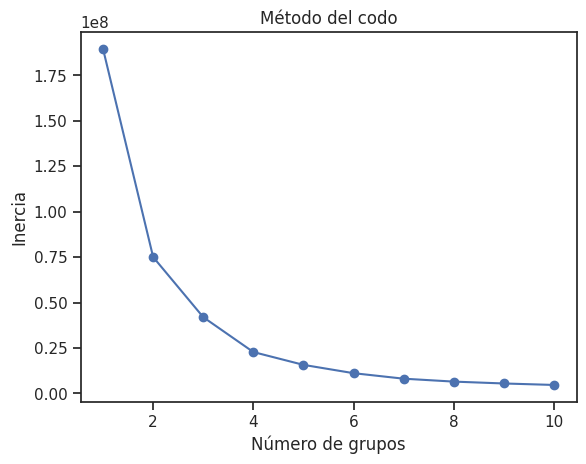

In [68]:
# Crear un dataframe a partir del array df_t3_pca con las columnas PC1 y PC2
df_t3_pca_df = pd.DataFrame(df_t3_pca, columns=['PC1', 'PC2'])

# Crear un rango de valores de k
k_range = range(1, 11)

# Crear una lista vacía para guardar las inercias
inercias = []

# Iterar sobre el rango de k
for k in k_range:
  # Crear y ajustar un modelo k medias con k grupos
  kmeans = KMeans(n_clusters=k,n_init=10)
  kmeans.fit(df_t3_pca_df)
  # Añadir la inercia del modelo a la lista
  inercias.append(kmeans.inertia_)

# Graficar la lista de inercias en función del rango de k
plt.plot(k_range, inercias, marker='o')
plt.xlabel('Número de grupos')
plt.ylabel('Inercia')
plt.title('Método del codo')
plt.show()

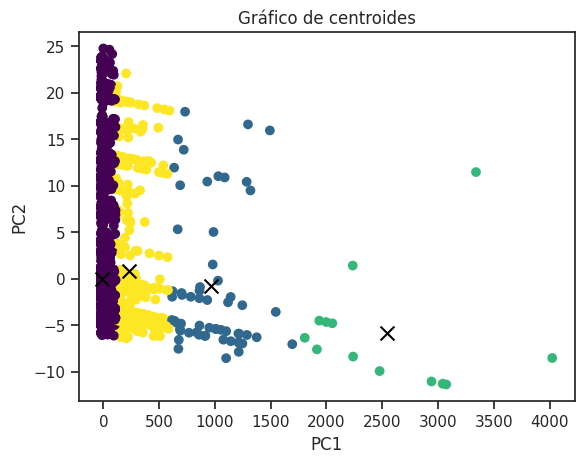

In [69]:
# Elegir el valor óptimo de k, por ejemplo, 4
k_optimo = 4

# Crear y ajustar un modelo k medias con k óptimo
kmeans = KMeans(n_clusters=k_optimo, n_init=10)
kmeans.fit(df_t3_pca_df)

# Obtener las etiquetas y los centroides de los grupos
etiquetas = kmeans.labels_
centroides = kmeans.cluster_centers_

# Graficar el dataframe con los puntos coloreados según las etiquetas y los centroides con un símbolo 'x'
plt.scatter(df_t3_pca_df['PC1'], df_t3_pca_df['PC2'], c=etiquetas, cmap='viridis')
plt.scatter(centroides[:, 0], centroides[:, 1], marker='x', s=100, c='black')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Gráfico de centroides')
plt.show()

In [70]:
# Prueba de Feature Selection

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Utilizamos SelectKBest para elegir las 5 mejores features
selector = SelectKBest(chi2, k=5)

# Usamos el FIT
selector.fit(X, y)

# Transformamos los datos
X_new = selector.transform(X)

# Imprimimos la matriz
print(X_new)


[[0.00000000e+00 1.00000000e+00 4.00000000e+00 4.00000000e+00
  4.04300000e+03]
 [0.00000000e+00 1.00000000e+00 4.00000000e+00 3.00000000e+00
  3.36000000e+03]
 [0.00000000e+00 0.00000000e+00 4.00000000e+00 3.00000000e+00
  3.06100000e+03]
 ...
 [0.00000000e+00 0.00000000e+00 4.00000000e+00 4.00000000e+00
  1.93298808e+01]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 4.00000000e+00
  1.93298808e+01]
 [0.00000000e+00 0.00000000e+00 4.00000000e+00 4.00000000e+00
  1.93298808e+01]]
